In [68]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These) and read the data
mouse_drug_data = pd.read_csv('data/mouse_drug_data.csv')
clinical_trial_data = pd.read_csv('data/clinicaltrial_data.csv')

# COmbining the data
read_data = pd.merge(mouse_drug_data,clinical_trial_data, on = "Mouse ID")

# Display data
read_data.head()





,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [40]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mean_tumor = read_data.groupby(["Drug","Timepoint"]).mean()["Tumor Volume (mm3)"]

# Convert to DataFrame
tumor_df = pd.DataFrame(mean_tumor)
tumor_index = tumor_df.reset_index()

# Preview DataFrame
tumor_index.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [41]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
st_tumor = read_data.groupby(["Drug","Timepoint"]).sem()["Tumor Volume (mm3)"]

# Convert to DataFrame
st_df = pd.DataFrame(st_tumor)
st_index = st_df.reset_index()
# Preview DataFrame
st_index.head()



,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [5]:
# Minor Data Munging to Re-Format the Data Frames
reformat = pd.pivot_table(read_data, index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')

# Preview that Reformatting worked
reformat.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


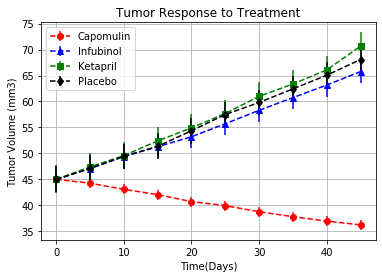

In [8]:
# Generate the Plot (with Error Bars)

timepoint = reformat.index
plt.errorbar(timepoint, reformat['Capomulin'],yerr=reformat['Capomulin'].sem(), marker ='o', color = 'r', linestyle='--', label="Capomulin")
plt.errorbar(timepoint, reformat['Infubinol'],yerr=reformat['Infubinol'].sem(), marker ='^', color = 'b', linestyle='--', label="Infubinol")
plt.errorbar(timepoint, reformat['Ketapril'],yerr=reformat['Ketapril'].sem(), marker ='s', color = 'g', linestyle='--', label="Ketapril")
plt.errorbar(timepoint, reformat['Placebo'],yerr=reformat['Placebo'].sem(), marker ='d', color = 'k', linestyle='--', label="Placebo")

plt.gca().set(xlabel = 'Time(Days)', ylabel = 'Tumor Volume (mm3)',title = 'Tumor Response to Treatment')
plt.legend(loc = 'best')
plt.grid(True)
#Save the figure
plt.savefig("figure1.png")



In [7]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [9]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mean_meta = read_data.groupby(["Drug","Timepoint"]).mean()["Metastatic Sites"]
# Convert to DataFrame
meta_df = pd.DataFrame(mean_meta)
meta_index = meta_df.reset_index()
# Preview DataFrame
meta_index.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [10]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
st_meta = read_data.groupby(["Drug","Timepoint"]).sem()["Metastatic Sites"]

# Convert to DataFrame
st_meta_df = pd.DataFrame(st_meta)
st_meta_index = st_meta_df.reset_index()
# Preview DataFrame
st_meta_index.head()


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [11]:
# Minor Data Munging to Re-Format the Data Frames
reformat_meta = pd.pivot_table(read_data, index='Timepoint', columns='Drug', values='Metastatic Sites')

# Preview that Reformatting worked
reformat_meta.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


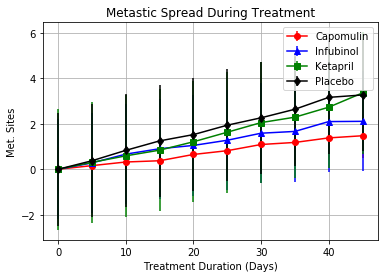

In [12]:
# Generate the Plot (with Error Bars)
timepoint_meta = reformat_meta.index
plt.errorbar(timepoint, reformat_meta['Capomulin'],yerr=reformat['Capomulin'].sem(), marker ='o', color = 'r', linestyle='-', label="Capomulin")
plt.errorbar(timepoint, reformat_meta['Infubinol'],yerr=reformat['Infubinol'].sem(), marker ='^', color = 'b', linestyle='-', label="Infubinol")
plt.errorbar(timepoint, reformat_meta['Ketapril'],yerr=reformat['Ketapril'].sem(), marker ='s', color = 'g', linestyle='-', label="Ketapril")
plt.errorbar(timepoint, reformat_meta['Placebo'],yerr=reformat['Placebo'].sem(), marker ='d', color = 'k', linestyle='-', label="Placebo")

plt.gca().set(xlabel = 'Treatment Duration (Days)', ylabel = 'Met. Sites',title = 'Metastic Spread During Treatment')
plt.legend(loc = 'best')
plt.grid(True)
# Save the Figure
plt.savefig("figure2.png")



![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [13]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
survival_rate = read_data.groupby(["Drug","Timepoint"]).count()["Mouse ID"]

# Convert to DataFrame
sr_df = pd.DataFrame({"Mouse Count":survival_rate})
sr_index = sr_df.reset_index()
# Preview DataFrame
sr_index.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [21]:
# Minor Data Munging to Re-Format the Data Frames
mouse_count = read_data.count()["Tumor Volume (mm3)"]
reformat_sr = pd.pivot_table(sr_df,index="Timepoint", columns="Drug")["Mouse Count"]
# Preview the Data Frame
reformat_sr.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


In [34]:
sr_percentage = reformat_sr.copy()
sr_percentage = round(sr_percentage.apply(lambda x: x / x.max() * 100))
sr_percentage.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
5,100.0,84.0,100.0,92.0,92.0,96.0,96.0,100.0,96.0,96.0
10,100.0,80.0,84.0,88.0,84.0,96.0,88.0,96.0,88.0,88.0
15,96.0,76.0,84.0,76.0,84.0,80.0,65.0,96.0,88.0,84.0
20,92.0,72.0,80.0,76.0,80.0,76.0,65.0,92.0,81.0,68.0


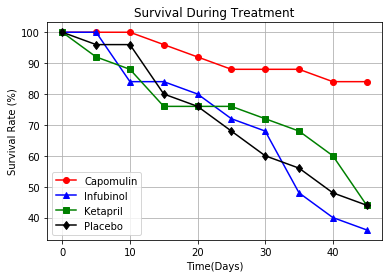

In [33]:
# Generate the Plot (Accounting for percentages)
timepoint_meta = reformat_meta.index
plt.plot(timepoint, sr_percentage['Capomulin'],marker ='o', color = 'r', linestyle='-', label="Capomulin")
plt.plot(timepoint, sr_percentage['Infubinol'], marker ='^', color = 'b', linestyle='-', label="Infubinol")
plt.plot(timepoint, sr_percentage['Ketapril'], marker ='s', color = 'g', linestyle='-', label="Ketapril")
plt.plot(timepoint, sr_percentage['Placebo'], marker ='d', color = 'k', linestyle='-', label="Placebo")

plt.gca().set(xlabel = 'Time(Days)', ylabel = 'Survival Rate (%)',title = 'Survival During Treatment')
plt.legend(loc = 'best')
plt.grid(True)

# Save the Figure
plt.savefig("figure3.png")
# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [66]:
# Calculate the percent changes for each drug
percent_change = (((mean_tumor.iloc[-1]-mean_tumor.iloc[0])/mean_tumor.iloc[0])*100)
# Display the data to confirm
percent_change

46.57975086509525

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [69]:
# Store all Relevant Percent Changes into a Tuple

# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

AttributeError: 'numpy.float64' object has no attribute 'index'

![Metastatic Spread During Treatment](../Images/change.png)